# Round 2

For this lab, we will be using the marketing_customer_analysis.csv file that you can find in the files_for_lab folder. Check out the files_for_lab/about.md to get more information if you are using the Online Excel.

1. Show the dataframe shape.
2. Standardize header names.
3. Which columns are numerical?
4. Which columns are categorical?
5. Check and deal with NaN values.
6. Datetime format - Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie. January, February and March. Hint: If data from March does not exist, consider only January and February.
7. BONUS: Put all the previously mentioned data transformations into a function.

In [122]:
import pandas as pd
import numpy as np

In [123]:
data = pd.read_csv('marketing_customer_analysis.csv')

In [124]:
data.shape

(10910, 26)

In [125]:
data.select_dtypes(np.number)

,Unnamed: 0,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,4,9025.067525,23675,117,NaN,31,NaN,7,707.925645
...,...,...,...,...,...,...,...,...,...
10905,10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000
10906,10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10908,10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849


In [126]:
data.select_dtypes(object)

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN
10908,WA60547,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


In [127]:
data.isna().sum()

Unnamed: 0                          0
Customer                            0
State                             631
Customer Lifetime Value             0
Response                          631
Coverage                            0
Education                           0
Effective To Date                   0
EmploymentStatus                    0
Gender                              0
Income                              0
Location Code                       0
Marital Status                      0
Monthly Premium Auto                0
Months Since Last Claim           633
Months Since Policy Inception       0
Number of Open Complaints         633
Number of Policies                  0
Policy Type                         0
Policy                              0
Renew Offer Type                    0
Sales Channel                       0
Total Claim Amount                  0
Vehicle Class                     622
Vehicle Size                      622
Vehicle Type                     5482
dtype: int64

In [128]:
data = data.drop(['Vehicle Type'], axis=1) #I decided to drop this whole column
#because half of it is a null value and the vehicle type doesn't affect the data that I want to aqquire
data


,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,40,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,27,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize


In [129]:
#Datetime format - Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie. January, February and March. Hint: If data from March does not exist, consider only January and February.

data['month'] = pd.DatetimeIndex(data['Effective To Date']).month
data=data[(data['month'] <= 2)]
data

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,2
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,1
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,2
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,1
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,1
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,1
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,2
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,2


# Round3

1.Show DataFrame info.
2.Describe DataFrame.
3.Show a plot of the total number of responses.
4.Show a plot of the response rate by the sales channel.
5.Show a plot of the response rate by the total claim amount.
6.Show a plot of the response rate by income.

In [130]:
df = pd.DataFrame(data)
print (df.dtypes)

Unnamed: 0                         int64
Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim          float64
Months Since Policy Inception      int64
Number of Open Complaints        float64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size    

In [131]:
data.describe().round(2)

,Unnamed: 0,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,month
count,10910.00,10910.00,10910.00,10910.00,10277.00,10910.00,10277.00,10910.00,10910.00,10910.00
mean,5454.50,8018.24,37536.28,93.20,15.15,48.09,0.38,2.98,434.89,1.47
std,3149.59,6885.08,30359.20,34.44,10.08,27.94,0.91,2.40,292.18,0.50
min,0.00,1898.01,0.00,61.00,0.00,0.00,0.00,1.00,0.10,1.00
25%,2727.25,4014.45,0.00,68.00,6.00,24.00,0.00,1.00,271.08,1.00
50%,5454.50,5771.15,33813.50,83.00,14.00,48.00,0.00,2.00,382.56,1.00
75%,8181.75,8992.78,62250.75,109.00,23.00,71.00,0.00,4.00,547.20,2.00
max,10909.00,83325.38,99981.00,298.00,35.00,99.00,5.00,9.00,2893.24,2.00


In [132]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [133]:
data['Response'].value_counts()

No     8813
Yes    1466
Name: Response, dtype: int64

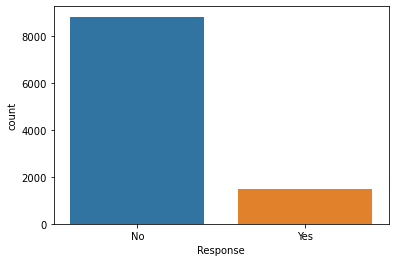

In [134]:
sns.countplot(x='Response', data=data)
plt.show()

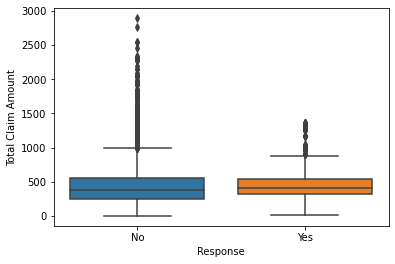

In [135]:
sns.boxplot (x='Response', y='Total Claim Amount', data=data)
plt.show()

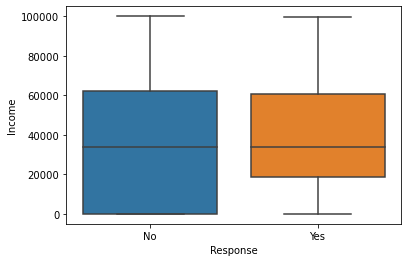

In [136]:
sns.boxplot (x='Response', y='Income', data=data)
plt.show()

# Round 4

Complete the following task

-Check the data types of the columns.
-Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively) (Make new dataframe)


Now we will try to check the normality of the numerical variables visually

    Use seaborn library to construct distribution plots for the numerical variables
    Use Matplotlib to construct histograms
    Do the distributions for different numerical variables look like a normal distribution 


For the numerical variables, check the multicollinearity between the features.(heatmap) 
    
    Please note that we will use the column total_claim_amount later as the target variable.

Drop one of the two features that show a high correlation between them (greater than 0.9). above .9 drop
Write code for both the correlation matrix and for seaborn heatmap.
If there is no pair of features that have a high correlation, then do not drop any features


In [137]:
data.dtypes

Unnamed: 0                         int64
Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim          float64
Months Since Policy Inception      int64
Number of Open Complaints        float64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size    

In [138]:
df1 = data.select_dtypes(include = np.number)
df2 = data.select_dtypes(include = object)
display(df1)
display(df2)

,Unnamed: 0,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,month
0,0,4809.216960,48029,61,7.0,52,0.0,9,292.800000,2
1,1,2228.525238,0,64,3.0,26,0.0,1,744.924331,1
2,2,14947.917300,22139,100,34.0,31,0.0,2,480.000000,2
3,3,22332.439460,49078,97,10.0,3,0.0,2,484.013411,1
4,4,9025.067525,23675,117,NaN,31,NaN,7,707.925645,1
...,...,...,...,...,...,...,...,...,...,...
10905,10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000,1
10906,10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929,1
10907,10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996,2
10908,10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849,2


,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize
10907,TL39050,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize
10908,WA60547,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize


In [139]:
df1.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,10910.0,5454.50,3149.59,0.00,2727.25,5454.50,8181.75,10909.00
Customer Lifetime Value,10910.0,8018.24,6885.08,1898.01,4014.45,5771.15,8992.78,83325.38
Income,10910.0,37536.28,30359.20,0.00,0.00,33813.50,62250.75,99981.00
Monthly Premium Auto,10910.0,93.20,34.44,61.00,68.00,83.00,109.00,298.00
Months Since Last Claim,10277.0,15.15,10.08,0.00,6.00,14.00,23.00,35.00
Months Since Policy Inception,10910.0,48.09,27.94,0.00,24.00,48.00,71.00,99.00
Number of Open Complaints,10277.0,0.38,0.91,0.00,0.00,0.00,0.00,5.00
Number of Policies,10910.0,2.98,2.40,1.00,1.00,2.00,4.00,9.00
Total Claim Amount,10910.0,434.89,292.18,0.10,271.08,382.56,547.20,2893.24
month,10910.0,1.47,0.50,1.00,1.00,1.00,2.00,2.00


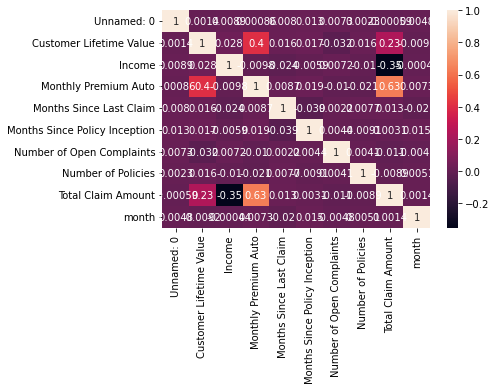

In [140]:
#heatmap
correlations_matrix = df1.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [141]:
correlations_matrix
#to  see the correlations clearly

,Unnamed: 0,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,month
Unnamed: 0,1.000000,0.001355,0.008910,0.000863,0.007958,0.012795,0.007325,0.002319,-0.000593,0.004755
Customer Lifetime Value,0.001355,1.000000,0.028306,0.403069,0.016052,0.016960,-0.032243,0.016024,0.232626,-0.009234
Income,0.008910,0.028306,1.000000,-0.009788,-0.023814,-0.005903,0.007163,-0.009960,-0.354141,-0.000443
Monthly Premium Auto,0.000863,0.403069,-0.009788,1.000000,0.008744,0.018953,-0.010350,-0.020505,0.631799,0.007253
Months Since Last Claim,0.007958,0.016052,-0.023814,0.008744,1.000000,-0.039318,0.002246,0.007678,0.013137,-0.019951
Months Since Policy Inception,0.012795,0.016960,-0.005903,0.018953,-0.039318,1.000000,0.004376,-0.009123,0.003095,0.015163
Number of Open Complaints,0.007325,-0.032243,0.007163,-0.010350,0.002246,0.004376,1.000000,0.004098,-0.011379,-0.004813
Number of Policies,0.002319,0.016024,-0.009960,-0.020505,0.007678,-0.009123,0.004098,1.000000,-0.008923,0.005127
Total Claim Amount,-0.000593,0.232626,-0.354141,0.631799,0.013137,0.003095,-0.011379,-0.008923,1.000000,0.001425
month,0.004755,-0.009234,-0.000443,0.007253,-0.019951,0.015163,-0.004813,0.005127,0.001425,1.000000


In [142]:
#decided not to drop anythinng because there were no correlations above 0.9
#normalization is not neede for linear regression

# Round5

Get data r2
Explore r3
X-y split. x num, x cat ev but total claim amt y total claim amt
 new data frame X (features)
    total claim amt (target)
Normalize (numerical). / minmax/ scale x numerical



In [146]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [147]:
y = df1['Total Claim Amount']
X = df1.drop(['Total Claim Amount'], axis=1) #tried to run and reverse it various times, still shows the same error.
##cant continue from this.

In [148]:
X=X.drop(columns=['Customer','Effective To Date','month','Response'],axis=1)

KeyError: "['Customer', 'Effective To Date', 'Response'] not found in axis"

In [ ]:
X_num1=X.select_dtypes(np.number)
X_cat1=X.select_dtypes(object)

In [ ]:
X_num1.shape

In [ ]:
X_num=X._get_numeric_data()
X_cat=X.drop(columns=X_num.columns)

print(X.shape, X_num.shape, X_cat.shape)

In [ ]:
X_num.describe().T

In [ ]:
transformer=MinMaxScaler().fit(X_num)
X_norm=transformer.transform(X_num)
print(X_norm.shape)
X_num_scale=pd.DataFrame(X_norm, columns=X_num.columns)
X_num_scale.head()

In [ ]:
transformer=StandardScaler().fit(X_num)
X_standard=transformer.transform(X_num)
print(X_standard.shape)
X_num_standard=pd.DataFrame(X_standard,columns=X_num.columns)
X_num_standard.head()

# Round 6

One Hot/Label Encoding (categorical).

Concat DataFrames

Linear Regression
    Train-test split.
    Apply linear regression.

Model Validation
    Description:
        R2.
        MSE.
        RMSE.
        MAE.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [168]:
encoder=OneHotEncoder(drop='first').fit(X_cat)
cols = encoder.get_feature_names(input_features=X_cat.columns)
X_cat_encode=pd.DataFrame(encoder.transform(X_cat).toarray(),columns=cols)
X_cat_encode.head()

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,State_California,State_Nevada,State_Oregon,State_Washington,State_nan,Coverage_Extended,Coverage_Premium,Education_College,Education_Doctor,Education_High School or Below,...,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Class_nan,Vehicle Size_Medsize,Vehicle Size_Small,Vehicle Size_nan
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [191]:
#data = [X_num1 , X_cat1]
#X1 = pd.concat(data, axis= 1)
#X1
X1 = pd.concat ([X_num1, X_cat_encode,], axis=1)
X1

,Unnamed: 0,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,State_California,State_Nevada,...,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Class_nan,Vehicle Size_Medsize,Vehicle Size_Small,Vehicle Size_nan
0,0,4809.216960,48029,61,7.0,52,0.0,9,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,2228.525238,0,64,3.0,26,0.0,1,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,14947.917300,22139,100,34.0,31,0.0,2,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3,22332.439460,49078,97,10.0,3,0.0,2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,9025.067525,23675,117,NaN,31,NaN,7,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,15563.369440,0,253,NaN,40,NaN,7,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10906,10906,5259.444853,61146,65,7.0,68,0.0,6,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10907,10907,23893.304100,39837,201,11.0,63,0.0,2,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10908,10908,11971.977650,64195,158,0.0,27,4.0,6,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [170]:
y = df1['Total Claim Amount']
y

0         292.800000
1         744.924331
2         480.000000
3         484.013411
4         707.925645
            ...     
10905    1214.400000
10906     273.018929
10907     381.306996
10908     618.288849
10909    1021.719397
Name: Total Claim Amount, Length: 10910, dtype: float64

In [174]:
#Linear Regression Train-test split. Apply linear regression.
from sklearn.model_selection import train_test_split
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)


In [175]:
print(X1_train.shape)
print(X1_test.shape)
print(y_train.shape)
print(y_test.shape)

(8728, 53)
(2182, 53)
(8728,)
(2182,)


In [177]:
X1['Months Since Last Claim'].fillna((X1['Months Since Last Claim'].mean()), inplace=True)
X1['Number of Open Complaints'].fillna(0)
#substituted values because it shows the same error "Input contains NaN, infinity or a value too large for dtype('float64')"for the next steps 

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10905    0.0
10906    0.0
10907    0.0
10908    4.0
10909    0.0
Name: Number of Open Complaints, Length: 10910, dtype: float64

In [179]:
lm = linear_model.LinearRegression()
lm.fit(X1_train,y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [184]:
##decided to move on to next exercise. Model Validation Description: R2. MSE. RMSE. MAE.
from sklearn.metrics import *

In [183]:
X1trainpredict = lm.predict(X1_train)
X1testpredict = lm.predict(X1_test) 
##shows the same error because I couldn't figure out how t solve error in previous exercise

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [185]:
print("r2 score of training values:",r2_score(y_train, X1trainpredict))
print("r2 score of test values:",r2_score(y_test, X1testpredict))

NameError: name 'X1trainpredict' is not defined

In [ ]:
print("MSE or mean_squared_error score of training values:",mean_squared_error(y_train, X1trainpredict))
print("MSE or mean_squared_error score of test values:",mean_squared_error(y_test, X1testpredict))

In [ ]:
print("RMSE score of training values:",np.sqrt(y_train, X1trainpredict))
print("RMSE score of test values:",np.sqrt(y_test, X1testpredict))

In [ ]:
print("MAE mean_absolute_error score of training values:",mean_absolute_error(y_train, X1trainpredict))
print("MAE mean_absolute_error score of test values:",mean_absolute_error(y_test, X1testpredict))

# Round 7

In [ ]:
Try to improve the linear regression model.

In [192]:
X2=X1.drop(['Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies'], axis = 1)
X2
#DECIDED TO DROP UNNECESARY COLUMNS FOR THIS EXERCISE

,Unnamed: 0,Customer Lifetime Value,Income,Monthly Premium Auto,State_California,State_Nevada,State_Oregon,State_Washington,State_nan,Coverage_Extended,...,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Class_nan,Vehicle Size_Medsize,Vehicle Size_Small,Vehicle Size_nan
0,0,4809.216960,48029,61,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,2228.525238,0,64,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,14947.917300,22139,100,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3,22332.439460,49078,97,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,9025.067525,23675,117,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,15563.369440,0,253,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10906,10906,5259.444853,61146,65,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10907,10907,23893.304100,39837,201,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10908,10908,11971.977650,64195,158,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [194]:
lm2 = linear_model.LinearRegression()
lm2.fit(X2,y)

LinearRegression()

In [ ]:
##couldn't figure out how to continue from this.

# Final Round

Present results.

This has been an intense and challenging. I've learnt a lot and I got lost lots of time too. Firstly, I learnt how to use Jupyter notebook as it was my first time using this. I've learn how to push data into the lab, clean data and filter it. Though I still have to master the whole concept of processing of data because for me it was a very extensive matter that includes loads of data and procedure. I coludn't seem to cope up that much from the lessons from round 5 and further (information overload I guess), I think we need to have a quick recap of the week.